In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python utilizada neste Notebook: ', python_version())

Versão da Linguagem Python utilizada neste Notebook:  3.9.12


In [2]:
# Imports
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Deixando às células com 99% de largura do monitor.

from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [4]:
# Versões dos pacotes utilizados (imports)

%reload_ext watermark
%watermark -a "Sandro Luiz Mazzolla Junior - TCC" --iversions

Author: Sandro Luiz Mazzolla Junior - TCC

pandas    : 1.4.2
numpy     : 1.21.5
seaborn   : 0.11.2
scipy     : 1.7.3
matplotlib: 3.5.1



## Carregando o DataSet

In [5]:
df = pd.read_csv('dados/dataset.csv')

In [6]:
# Formato do Dataset em linhas , colunas
df.shape

(11000, 12)

In [7]:
# Informações sobre colunas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Lista de colunas categóricas
categoricas = ['corredor_armazem',
               'modo_envio',
               'prioridade_produto',
               'genero']

In [9]:
# Lista de colunas numéricas
numericas = ['numero_chamadas_cliente',
             'avaliacao_cliente',
             'custo_produto',
             'compras_anteriores',
             'desconto',
             'peso_gramas']

# ID não possui nenhuma informação útil

In [10]:
# Variável alvo, estudo será feito com base nesta variável
target = ['entregue_no_prazo']

In [11]:
# Resumo das Variáveis Numéricas
df[numericas].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [12]:
# Resumo das variáveis categóricas
df[categoricas].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [13]:
# Contando valores únicos (cada categoria) da variável alvo

# 1 classe positiva, entrega dentro do prazo
# 0 classe negativa, entrega fora do prazo
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
dtype: int64

## Limpeza de Dados

### Tratamento de Valores Duplicados

**ATENÇÃO**: Valor ausente significa ausência de informação e não ausência de dado!

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. Mas fique atento: a Engenharia de Atributos e o Pré-Processamento podem gerar valores ausentes, o que precisa ser tratado.

In [14]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [15]:
# Verificando se há valores ausentes

df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro, incluindo o ID).

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos.

In [16]:
df.head(3)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1


In [17]:
# Verificando se há valores duplicados

df.duplicated().sum()

0

### Tratamento de Valores Outliers

O tratamento pode ser feito antes, durante ou depois da Análise Exploratória, mas idealmente deve ser feito antes da Engenharia de Atributos. 

In [18]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 11000


In [19]:
df[numericas].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [20]:
# Cálculo da média de 'desconto'

df.desconto.mean()

13.372545454545454

In [21]:
# Desvio padrão de 'desconto'

df.desconto.std()

16.20494287359407

<AxesSubplot:>

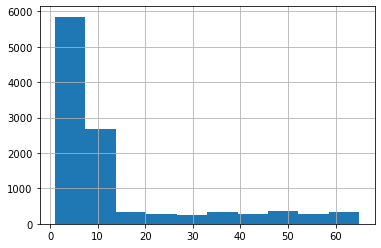

In [22]:
# Histograma de 'desconto'

df.desconto.hist()

Observando o gráfico, podemos dizer que a maioria dos produtos sofreram um desconto menor que a média, e também valores bem acima da média.

In [23]:
# Calculando os limites superior e inferior
# Um valor outlier é aquele que está abaixo ou acima do limite.

limiteSuperior = df.desconto.mean() + 3 * df.desconto.std()
print('Limite superior: ', limiteSuperior)

limiteInferior = df.desconto.mean() - 3 * df.desconto.std()
print('Limite inferior: ', limiteInferior)

Limite superior:  61.987374075327665
Limite inferior:  -35.24228316623676


Normalmente, segundo estatística, um outlier está 3 vezes acima ou abaixo do desvio padrão.

https://portaldatascience.com/outlier/

In [24]:
# Extaindo registros com outliers da coluna 'desconto'

df_outlier_desconto = df[(df.desconto <= limiteInferior) | (df.desconto >= limiteSuperior)]
df_outlier_desconto.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1


In [25]:
# Filtrando o dataframe removendo os registros com outliers
df = df[(df.desconto > limiteInferior) & (df.desconto < limiteSuperior)]

In [26]:
print(f'Número de linhas antes de filtrar valores extremos (outliers): {len(df)}')

Número de linhas antes de filtrar valores extremos (outliers): 10819


In [27]:
# Criando um array numpy de registros do tamanha do df (10819)

registros = np.array([True] * len(df))

In [28]:
type(registros)

numpy.ndarray

In [29]:
# Calculando os valores de True no array

np.count_nonzero(registros == True)

10819

In [30]:
# Calculando os valores de True no array

np.count_nonzero(registros == False)

0

O array de True é criado, para filtrar os valores outliers, caso um valor seja encontrado, a informação é transformada em False, facilitando assim a filtragem dos registros.

In [31]:
# Lista de colunas numéricas, sem a coluna 'desconto'
numericas2 = ['numero_chamadas_cliente',
             'avaliacao_cliente',
             'custo_produto',
             'compras_anteriores',
             'peso_gramas']

In [32]:
# Loop em cada variável númerica, para filtragem dos registros
for col in numericas2:
    
    # Calculando o z-score absoluto (pois não faz sentido buscar por valores negativos na variável)
    # Stats deriva do pacote stats, da importação scipy [2]
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém os valores com menos de 3 z-scores absoluto
    registros = (zscore < 3) & registros

Z-scores são o número de desvios padrão acima e abaixo da média. Por exemplo, um
escore Z de 2 indica que uma observação está dois desvios padrão acima da média, enquanto um
escore Z de -2 significa que está dois desvios padrão abaixo da média. Um Z-score de zero
representa um valor que é igual à média.

Quanto mais longe o Z-score de uma observação estiver de zero, mais incomum essa
observação será. Um valor de corte padrão para encontrar valores discrepantes são escores Z de
+/- 3 ou acima. 


In [33]:
np.count_nonzero(registros == True)

10643

In [34]:
np.count_nonzero(registros == False)

176

Valores 'False' são valores outliers

In [35]:
# Removendo registros com z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [36]:
print(f'Número de linhas após filtrar valores extremos (outliers): {len(df)}')

Número de linhas após filtrar valores extremos (outliers): 10643


### Tratamento de Desbalanceamento de Classe

Deve ser feito nos dados de treino, após o pré-processamento dos dados.

In [37]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [38]:
df['entregue_no_prazo'].value_counts()

1    6282
0    4361
Name: entregue_no_prazo, dtype: int64

Existe uma diferença entre valores de classe 1 e 0, caso esse valor for muito longe um do outros, é necessário balancear a classe.

## Engenharia de Atributos


### Feature Selection

Tomada de decisão de qual variável será utilizada na Engenharia de Atributos.

In [39]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [40]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
5732,5733,A,Caminhao,3,4,247,3,baixa,M,10,5749,1
59,60,F,Navio,4,1,150,3,alta,F,17,1923,1
7394,7395,A,Aviao,4,2,223,5,media,F,3,4480,0
6228,6229,D,Navio,6,2,269,4,baixa,M,6,1073,0
1076,1077,A,Caminhao,3,4,195,3,media,M,10,2021,1


In [41]:
# Correlação

df.corr()

,ID,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
ID,1.000000,0.190104,-0.008010,0.197842,0.184451,-0.591557,0.263811,-0.403501
numero_chamadas_cliente,0.190104,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186,-0.066327
avaliacao_cliente,-0.008010,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440,0.014809
custo_produto,0.197842,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885,-0.071954
compras_anteriores,0.184451,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066,-0.062599
desconto,-0.591557,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062,0.388192
peso_gramas,0.263811,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000,-0.258815
entregue_no_prazo,-0.403501,-0.066327,0.014809,-0.071954,-0.062599,0.388192,-0.258815,1.000000


<AxesSubplot:>

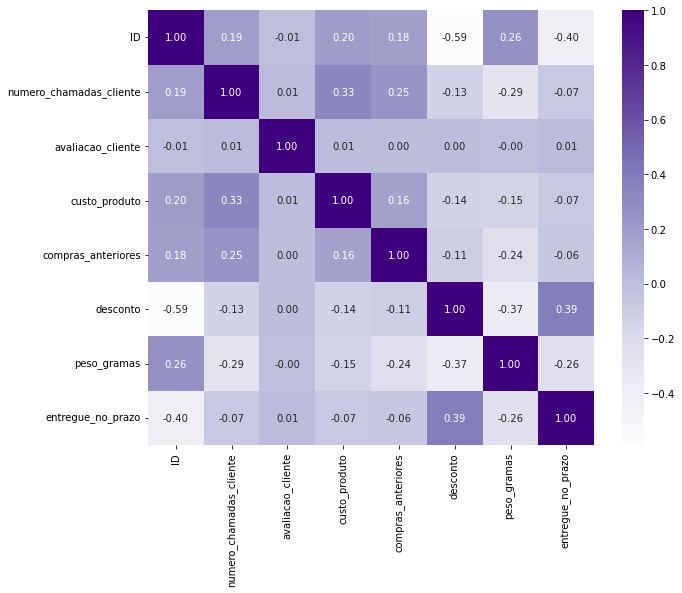

In [42]:
# Mapa de correlação

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Purples', annot = True, fmt = '.2f')

**Decisão**: Na figura acima, os recursos que ultrapassaram o limite (+/- 0,05) na correlação com o recurso de destino (entregue_no_prazo) serão escolhidos para serem processados na Engenharia de Atributos, nesse caso: numero_chamadas_cliente, custo_produto, compras_anteriores, desconto e peso_gramas.

A variável avaliacao_cliente não parece relevante e não será processada na Engenharia de Atributos. A variável ID será descartada, pois não representa informação útil.

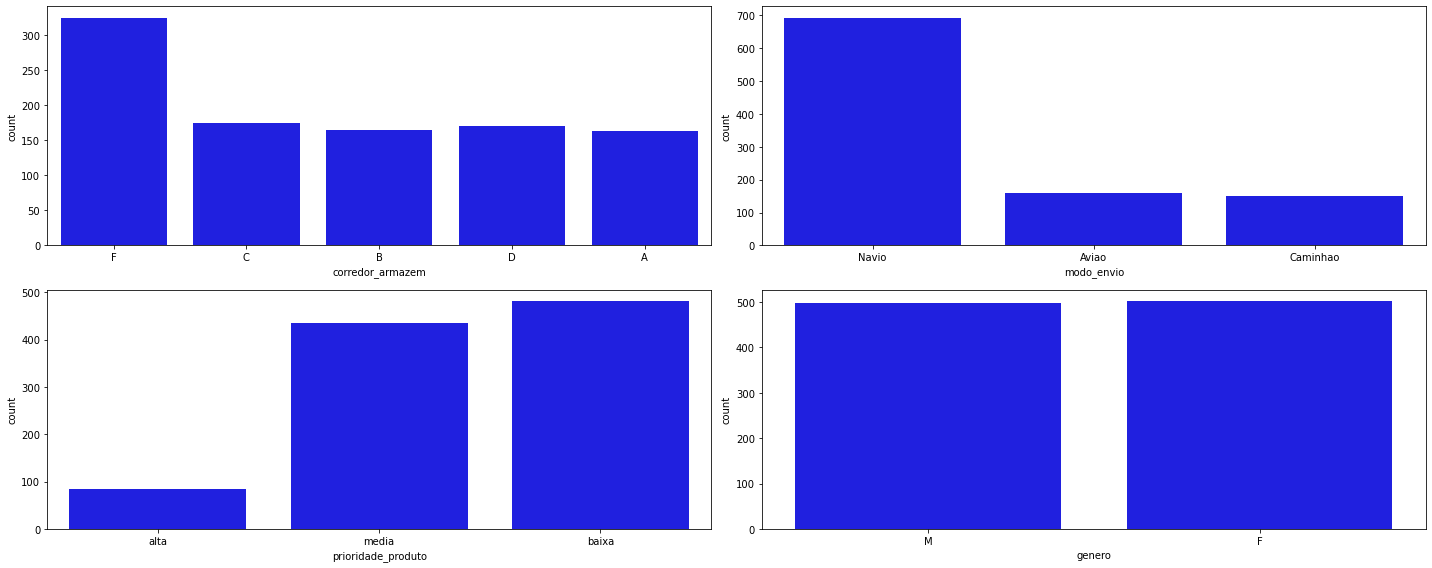

In [43]:
# Gráfico de barras
df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20,8))
for i in range(0, len(categoricas)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x = df_sample[categoricas[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: Na figura acima pode-se ver que todas as variáveis categóricas têm uma diferença bastante grande em termos de contagens das classes, exceto a variável de Gênero. Sendo assim, não vamos considerar a variável genero na Engenharia de Atributos.

## Feature Extraction 

Aqui fazemos a extração de novas variáveis a partir da informação contida em outras variáveis.

In [44]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [45]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [46]:
# Criando uma cópia do dataframe
df_eng = df.copy()

In [47]:
df_eng.shape

(10643, 12)

In [48]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

### 1- Performance de Envio do Produto Por Prioridade do Produto

Todo atraso no envio dos produtos é igual, ou seja, tem a mesma proporção? A prioridade de envio dos produtos gera mais ou menos atrasos?

Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico.
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático.
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável.
- Outra opção significa que o envio foi feito no prazo e não apresenta problema.

In [49]:
# Contando o número de valores para cada categoria da coluna 'prioridade_produto'

df_eng.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [50]:
# Criando uma nova coluna e preenchendo com nan (not a number)

df_eng['performance_prioridade_envio'] = np.nan

*Após aplicada a regra de negócio e ainda existirem valores nan, significa que a regra de negócio não abrange todos os valores, portanto é necessário revisar a regra de negócio aplicada.*

In [51]:
# Utilizando o np.where() para condicionar a coluna performance_prioridade_envio, conforme a regra de negócio

df_eng['performance_prioridade_envio'] = np.where(
                                            (df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Crítico',
                                        np.where(
                                            (df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
                                        np.where(
                                            (df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável',
                                        'Não Houve Atraso')))

In [52]:
# Contando o número de valores para cada categoria da coluna 'prioridade_produto'

df_eng.performance_prioridade_envio.value_counts()

Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: performance_prioridade_envio, dtype: int64

In [53]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
6661,6662,F,Navio,3,1,200,2,media,M,8,4337,0,Atraso Problemático
3534,3535,D,Navio,3,5,181,2,media,M,2,4089,0,Atraso Problemático
1298,1299,A,Navio,3,5,171,3,baixa,F,49,1333,1,Não Houve Atraso
8405,8406,F,Navio,5,3,135,3,media,F,5,4484,0,Atraso Problemático
10136,10137,A,Aviao,3,4,174,3,baixa,F,3,5366,1,Não Houve Atraso


In [54]:
# Agrupando os dados pela coluna 'performance_prioridade_envio' e 'entregue_no_prazo' agregando por 'prioridade_produto' para análise

df_report1 = df_eng.groupby(['performance_prioridade_envio', 
                             'entregue_no_prazo']).agg({'prioridade_produto': ['count']}).reset_index()
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [55]:
# Ajustando os nomes das colunas

df_report1.columns = ['performance_prioridade_envio', 'entregue_no_prazo', 'contagem']
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [56]:
# Pivot table (transformando linha em coluna e coluna em linha)

df_report1 = pd.pivot_table(df_report1,
                             index = 'performance_prioridade_envio',
                             columns = 'entregue_no_prazo',
                             values = 'contagem').reset_index()
df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [57]:
# Ajustando os nomes das colunas

df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [58]:
# Ajustando às colunas Total Atraso e Total no Prazo, para serem mostradas juntas

df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


*Replace em valores NaN para 0, é necessário para concatenar às duas colunas depois, como utilizaremos o método de somar às duas colunas para concatenar, é necessário essa troca, para assim, somar os valores de uma coluna com 0, dessa forma não alterando o valores das linhas das colunas.*

In [59]:
# Criando a terceira variável

df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo,Total
0,Atraso Crítico,310.0,0.0,310.0
1,Atraso Problemático,1917.0,0.0,1917.0
2,Atraso Tolerável,2134.0,0.0,2134.0
3,Não Houve Atraso,0.0,6282.0,6282.0


In [60]:
# Removendo às colunas utilizadas para concatenação da coluna 'Total'

df_report1.drop(df_report1.columns[[1, 2]], axis = 1, inplace = True)
df_report1.head()

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


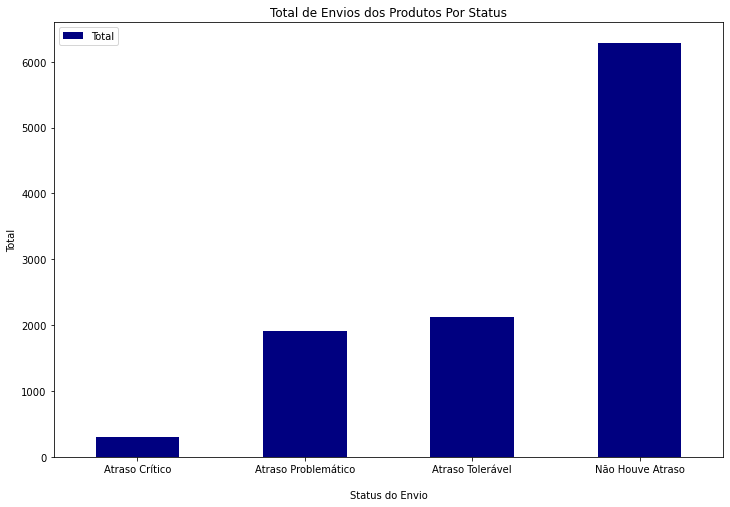

In [61]:
# Plot da tabela df_report1

#set_index é utilizado para que o pandas que o status do envio, seja o label mostrado no gráfico.
df_report1.set_index("Status do Envio").plot(kind = 'bar', 
                title = 'Total de Envios dos Produtos Por Status',
                ylabel = 'Total', 
                xlabel = '\nStatus do Envio',
                colormap = 'jet',
                figsize=(12,8))
plt.xticks(rotation = 0)
plt.show()